# Language Prediction on Multilingual Sentiment Analysis dataset
with dataset available on Kaggle: https://www.kaggle.com/datasets/suraj520/multi-task-learning



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("multilingual_sentiment_data.csv")
df

,tweet,language,sentiment
0,"Lionel Messi, que ha estado vinculado con un t...",es,3 stars
1,This is a guest post by The Joy of Truth. To r...,en,4 stars
2,Nous sommes tous conscients de la popularité d...,fr,5 stars
3,El baño en el sistema de metro de la ciudad de...,es,4 stars
4,"""Ich habe dies seit über 20 Jahren getan und i...",de,5 stars
...,...,...,...
4912,\nA former CIA officer and CIA director has pl...,en,1 star
4913,"Karen M. Felt, Ph.D. La ricerca è stata condot...",it,4 stars
4914,"Mit all der Aufmerksamkeit, die dem Thema Abtr...",de,2 stars
4915,L'élément le plus important dans le processus ...,fr,4 stars


### Data Cleaning

In [3]:
import re
import string

In [4]:
# remove punctuation from strings
def pulizia1(testo):
  testo1 = testo.translate(str.maketrans('', '', string.punctuation))
  if not testo1:
    return None
  return testo1

df["tweet2"] = df["tweet"].apply(pulizia1)
df.head()

,tweet,language,sentiment,tweet2
0,"Lionel Messi, que ha estado vinculado con un t...",es,3 stars,Lionel Messi que ha estado vinculado con un tr...
1,This is a guest post by The Joy of Truth. To r...,en,4 stars,This is a guest post by The Joy of Truth To re...
2,Nous sommes tous conscients de la popularité d...,fr,5 stars,Nous sommes tous conscients de la popularité d...
3,El baño en el sistema de metro de la ciudad de...,es,4 stars,El baño en el sistema de metro de la ciudad de...
4,"""Ich habe dies seit über 20 Jahren getan und i...",de,5 stars,Ich habe dies seit über 20 Jahren getan und ic...


In [5]:
df = df.dropna()

In [6]:
# all text to lower and remove spaces before and after
def pulizia2(testo):
  testo = testo.lower()
  testo = testo.strip()
  if not testo:
    return None
  return testo

df["tweet2"] = df["tweet2"].apply(pulizia2)
df.head()

C:\Users\lucre\AppData\Local\Temp\ipykernel_20632\1010482121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet2"] = df["tweet2"].apply(pulizia2)


,tweet,language,sentiment,tweet2
0,"Lionel Messi, que ha estado vinculado con un t...",es,3 stars,lionel messi que ha estado vinculado con un tr...
1,This is a guest post by The Joy of Truth. To r...,en,4 stars,this is a guest post by the joy of truth to re...
2,Nous sommes tous conscients de la popularité d...,fr,5 stars,nous sommes tous conscients de la popularité d...
3,El baño en el sistema de metro de la ciudad de...,es,4 stars,el baño en el sistema de metro de la ciudad de...
4,"""Ich habe dies seit über 20 Jahren getan und i...",de,5 stars,ich habe dies seit über 20 jahren getan und ic...


In [7]:
df = df.dropna()

In [8]:
# remove special character \n from string
def pulizia3(testo):
  testo = testo.replace("\n", "")
  if not testo:
    return None
  return testo

df["tweet2"] = df["tweet2"].apply(pulizia3)
df

,tweet,language,sentiment,tweet2
0,"Lionel Messi, que ha estado vinculado con un t...",es,3 stars,lionel messi que ha estado vinculado con un tr...
1,This is a guest post by The Joy of Truth. To r...,en,4 stars,this is a guest post by the joy of truth to re...
2,Nous sommes tous conscients de la popularité d...,fr,5 stars,nous sommes tous conscients de la popularité d...
3,El baño en el sistema de metro de la ciudad de...,es,4 stars,el baño en el sistema de metro de la ciudad de...
4,"""Ich habe dies seit über 20 Jahren getan und i...",de,5 stars,ich habe dies seit über 20 jahren getan und ic...
...,...,...,...,...
4912,\nA former CIA officer and CIA director has pl...,en,1 star,a former cia officer and cia director has plea...
4913,"Karen M. Felt, Ph.D. La ricerca è stata condot...",it,4 stars,karen m felt phd la ricerca è stata condotta p...
4914,"Mit all der Aufmerksamkeit, die dem Thema Abtr...",de,2 stars,mit all der aufmerksamkeit die dem thema abtre...
4915,L'élément le plus important dans le processus ...,fr,4 stars,lélément le plus important dans le processus d...


In [9]:
df.isnull().any()

tweet        False
language     False
sentiment    False
tweet2       False
dtype: bool

In [10]:
df["language"].value_counts()

fr    976
de    975
en    974
it    968
es    958
Name: language, dtype: int64

In [11]:
# remove rows with tweet length < 50 char or without letters
indici_da_elim = df[df['tweet2'].apply(lambda x: len(x) < 50 or bool(re.match("^\d+$", x)))].index
df = df.drop(indici_da_elim)

### Create train (60%), validation (20%) and test (20%) set or the total

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.4, stratify=df["language"], random_state=42)
val, test = train_test_split(test, test_size=0.5, stratify=test["language"], random_state=42)

In [13]:
print(train.shape)
print(val.shape)
print(test.shape)

(2875, 4)
(958, 4)
(959, 4)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train["tweet2"])
y = train["language"]

In [15]:
X_val = vectorizer.transform(val["tweet2"])
y_val = val["language"]
X_test = vectorizer.transform(test["tweet2"])
y_test = test["language"]

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

SVC(kernel='linear')

In [17]:
pred_val = svm.predict(X_val)
accuracy = accuracy_score(y_val, pred_val)
print("Accuratezza su validation:", accuracy)

Accuratezza su validation: 0.9906054279749478


In [18]:
pred_test = svm.predict(X_test)
accuracy = accuracy_score(y_test, pred_test)
print("Accuratezza su test:", accuracy)

Accuratezza su test: 0.9916579770594369


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

print("Classification Report:")
print(classification_report(y_test, pred_test))

Classification Report:
              precision    recall  f1-score   support

          de       0.99      0.98      0.99       193
          en       0.98      0.99      0.99       193
          es       0.99      1.00      1.00       190
          fr       1.00      0.99      1.00       193
          it       0.99      0.98      0.99       190

    accuracy                           0.99       959
   macro avg       0.99      0.99      0.99       959
weighted avg       0.99      0.99      0.99       959



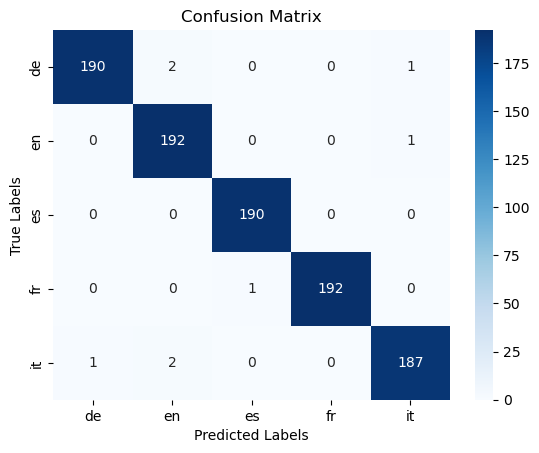

In [20]:
conf_matrix = confusion_matrix(y_test, pred_test)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()